## **Import Libraries**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## **Load Data**

In [21]:
df = pd.read_csv('/content/basket.csv')

## **EDA & Data Preprocessing**

In [22]:
# top rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# fill null value
df.fillna('!', inplace=True)

In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,!,!,!,!,!,!,!,!
1,sausage,whole milk,semi-finished bread,yogurt,!,!,!,!,!,!,!
2,soda,pickled vegetables,!,!,!,!,!,!,!,!,!
3,canned beer,misc. beverages,!,!,!,!,!,!,!,!,!
4,sausage,hygiene articles,!,!,!,!,!,!,!,!,!


In [25]:
# df to list
tr = df.values.tolist()
tr[: 3]

[['whole milk',
  'pastry',
  'salty snack',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!'],
 ['sausage',
  'whole milk',
  'semi-finished bread',
  'yogurt',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!'],
 ['soda', 'pickled vegetables', '!', '!', '!', '!', '!', '!', '!', '!', '!']]

In [26]:
# clean the list

for i in range(len(tr)):
  tr[i] = [x for x in tr[i] if x != '!']
print(tr[ : 4])

[['whole milk', 'pastry', 'salty snack'], ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['soda', 'pickled vegetables'], ['canned beer', 'misc. beverages']]


In [27]:
# encoding

en = TransactionEncoder()
tr_en = en.fit(tr).transform(tr)

transaction = pd.DataFrame(tr_en, columns=en.columns_)
transaction.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# find frequent items

frq_items = apriori(transaction, min_support=0.001, use_colnames=True)
frq_items.head()

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


In [30]:
# association rule

rules = association_rules(frq_items, metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,1.0,8.785064e-05,1.004426,0.058402,0.017544,0.004406,0.047279
1,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,1.0,8.785064e-05,1.001326,0.061307,0.017544,0.001325,0.047279
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,1.0,2.597018e-04,1.007196,0.175559,0.021947,0.007145,0.043064
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,1.0,2.597018e-04,1.008012,0.174891,0.021947,0.007949,0.043064
4,(citrus fruit),(beef),0.053131,0.033950,0.001804,0.033962,1.000349,1.0,6.297697e-07,1.000012,0.000369,0.021160,0.000012,0.043556


In [43]:
# clean only imp cols

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head()

,antecedents,consequents,support,confidence,lift
235,"(yogurt, sausage)",(whole milk),0.001470,0.255814,1.619866
217,"(rolls/buns, sausage)",(whole milk),0.001136,0.212500,1.345594
230,"(sausage, soda)",(whole milk),0.001069,0.179775,1.138374
202,(semi-finished bread),(whole milk),0.001671,0.176056,1.114825
223,"(yogurt, rolls/buns)",(whole milk),0.001337,0.170940,1.082428


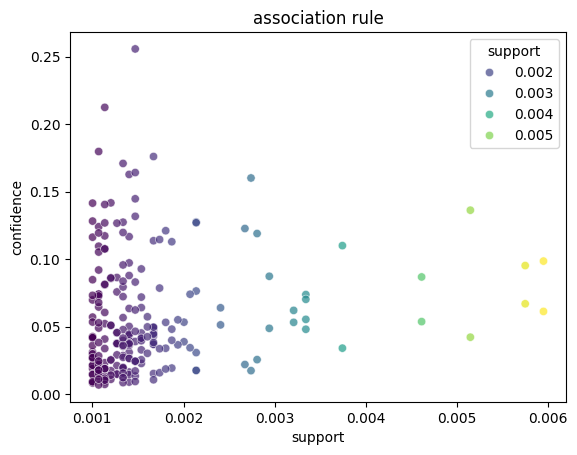

In [49]:
# visualization

sns.scatterplot(x='support', y='confidence', sizes='(50, 500)', hue='support', palette='viridis', alpha=0.7, data=rules)
plt.title('association rule')
plt.show()

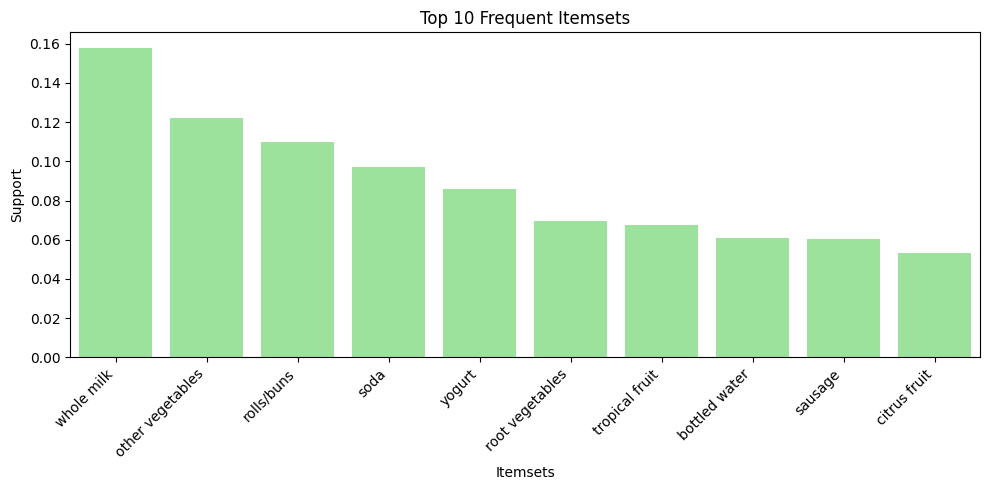

In [62]:
top_items = frq_items.sort_values(by='support', ascending=False).head(10)
top_items['itemsets'] = top_items['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,5))
sns.barplot(data=top_items, x=top_items['itemsets'].astype(str), y='support', color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.tight_layout()
plt.show()

/tmp/ipython-input-60-2486226021.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


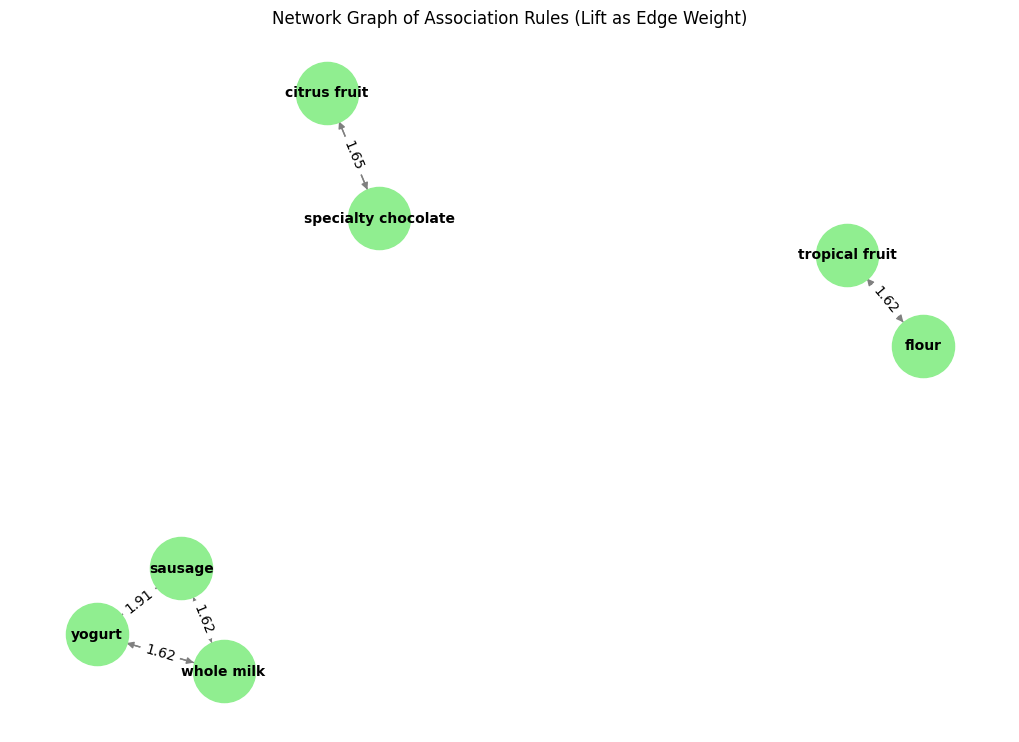

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# Use top N rules for clarity
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Create a directed graph
G = nx.DiGraph()

# Add edges from antecedents to consequents
for i, rule in top_rules.iterrows():
    for ant in rule['antecedents']:
        for con in rule['consequents']:
            G.add_edge(ant, con, weight=round(rule['lift'], 2))

# Draw the graph
plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, k=0.8)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10, font_weight='bold', edge_color='gray', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Network Graph of Association Rules (Lift as Edge Weight)')
plt.axis('off')
plt.tight_layout()
plt.show()


## **Finished**